In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

import os
import json


Populating the interactive namespace from numpy and matplotlib


## IDEA:
### Older people are less likely than younger people to use bike during night time (19:00-5:00)

### download and move  data to PUIDATA

In [2]:
### A function to download the data

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201503'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [6]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)

In [7]:
df['age']= 2017-df['birth year']

In [8]:
#df.drop(['birth year'], axis=1, inplace=True)
df.head()

,birth year,date,age
0,1987.0,2015-03-01 00:00:00,30.0
1,1968.0,2015-03-01 00:01:00,49.0
2,NaN,2015-03-01 00:01:00,NaN
3,1983.0,2015-03-01 00:02:00,34.0
4,1970.0,2015-03-01 00:02:00,47.0


### Lets separate older riders(_o) (>=40 years old) from younger riders (_y) (< 40 years old) to test the hypotheses.
### Lets plot the number of trips during 24 hours

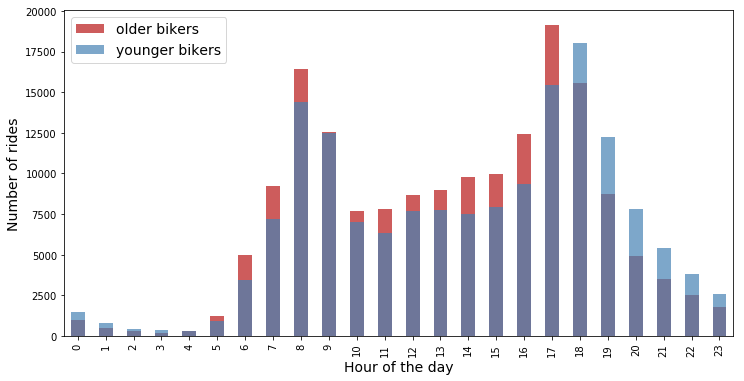

In [9]:
fig = pl.figure(figsize(12,6))
#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_o = 1
((df['date'][df['age'] >= 40].groupby([df['date'].dt.hour]).count()) / norm_o).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='older bikers')

norm_y = 1
ax = ((df['date'][df['age'] < 40].groupby([df['date'].dt.hour]).count()) / norm_y).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.7,
                                                                                              label='younger bikers')
pl.legend(fontsize=14)
#pl.title('Distribution of Citibike bikers by age in March 2015, absolute counts',fontsize=14)
pl.xlabel('Hour of the day',fontsize=14)
pl.ylabel('Number of rides',fontsize=14)

### Figure 1a: Distribution of Citibike bikers by age in March 2015, absolute counts

### Note: the counts have errors of course. what is the error on the count statistics? 
### for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic

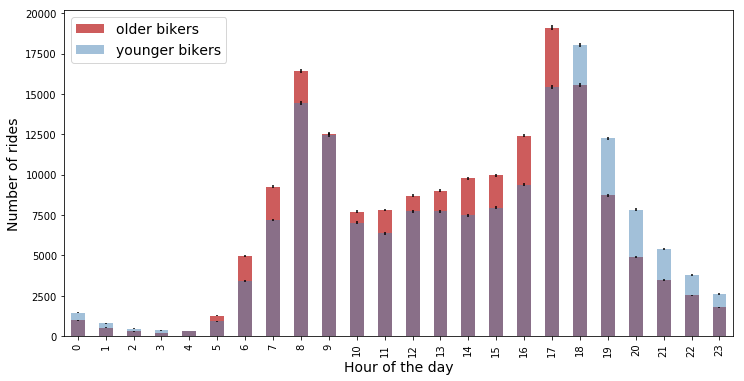

In [10]:
fig=pl.figure(figsize(12,6))

counts_o = df.date[df.age >= 40].groupby([df.date.dt.hour]).count()
norm_o = 1
error_o = np.sqrt(counts_o)
ax=((counts_o) / norm_o).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_o) / norm_o, (error_o) / norm_o)], label='older bikers')


counts_y = df.date[df.age < 40].groupby([df.date.dt.hour]).count()
norm_y = 1
error_y = np.sqrt(counts_y)
((counts_y) / norm_y).plot(kind="bar", alpha=0.5, yerr=[((error_y) / norm_y, (error_y) / norm_y)], 
                           color='SteelBlue', label='younger bikers')

ax.set_ylabel ("Number of rides",fontsize=14)
ax.set_xlabel ("Hour of the day",fontsize=14)
pl.legend(['older bikers','younger bikers'],fontsize=14)
#pl.title('Distribution of Citibike bikers by age in March 2015, absolute counts, with statistical errors',fontsize=14)

### Figure 1b: Distribution of Citibike bikers by age in March 2015, absolute counts, with statistical errors

Note: These are absolute numbers. It is very hard to compare absolute numbers. Ratios (or proportions) are more ameable to comparison, so let's _normalize_ the distribution of older and younger riders, i.e. devide them by the total number of rides for that age group. 


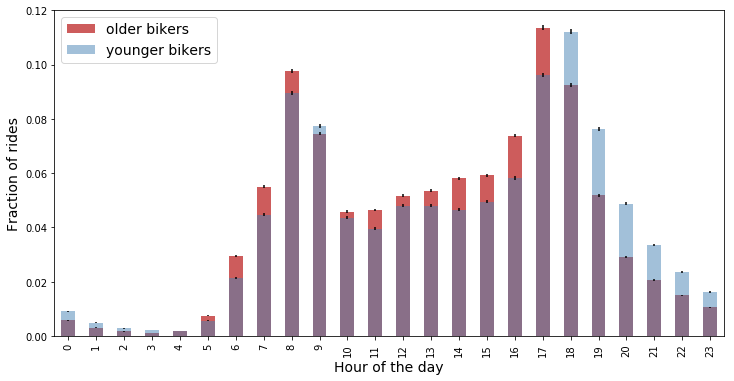

In [11]:
fig = pl.figure(figsize(12,6))

norm_o = counts_o.sum()
#error_o = np.sqrt(counts_o)
((counts_o) / norm_o).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_o) / norm_o, (error_o) / norm_o)], 
                           label='older bikers')

norm_y = counts_y.sum()
ax = ((counts_y) / norm_y).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_y) / norm_y, (error_y) / norm_y)], 
                                color='SteelBlue', label='younger bikers')

ax.set_ylabel ("Fraction of rides",fontsize=14)
ax.set_xlabel ("Hour of the day",fontsize=14)

pl.legend(['older bikers','younger bikers'],fontsize=14)
#pl.title('Distribution of Citibike bikers by age in March 2015, normalized',fontsize=14)

### Figure 2: Distribution of Citibike bikers by age in March 2015, normalized

### Set up the test of proportions

Older: day:0.859, night:0.141, day error:0.002, night error:0.001
Younger: day:0.781, night:0.219, day error:0.002, night error:0.001


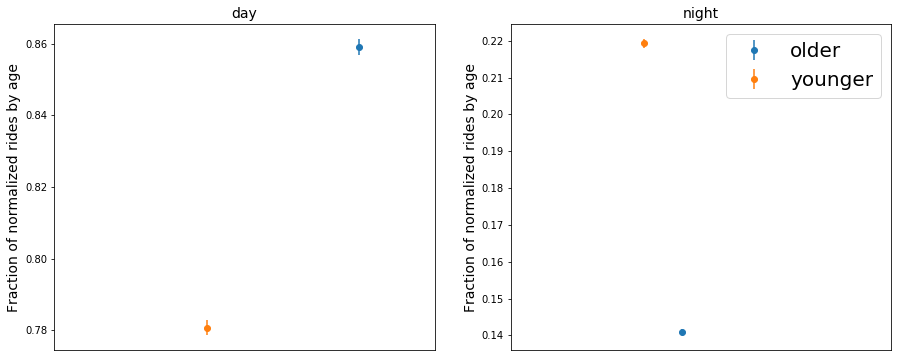

In [12]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

day_y = sum(counts_y[5:19]) * 1.0 / norm_y  #fraction of younger bikers riding at day time
night_y = (sum(counts_y[19:]) + sum(counts_y[:5])) * 1.0 / norm_y  #fraction of younger bikers riding at night time
eday_y = np.sqrt(sum(error_y[5:19]**2)) / norm_y  #error on fraction number of younger bikers riding at day time
enight_y = np.sqrt(sum(error_y[19:]**2) + sum(error_y[:5]**2)) / norm_y #error on fraction number of younger bikers riding at night time

#same calcuation as above for older riders
day_o = sum(counts_o[5:19]) * 1.0 / norm_o  
night_o = (sum(counts_o[19:]) + sum(counts_o[:5])) * 1.0 / norm_o  
eday_o = np.sqrt(sum(error_o[5:19]**2)) / norm_o  
enight_o = np.sqrt(sum(error_o[19:]**2) + sum(error_o[:5]**2)) / norm_o 

print("Older: day:{0:.3f}, night:{1:.3f}, day error:{2:.3f}, night error:{3:.3f}"\
      .format(day_o, night_o, eday_o, enight_o))
print("Younger: day:{0:.3f}, night:{1:.3f}, day error:{2:.3f}, night error:{3:.3f}"\
      .format(day_y, night_y, eday_y, enight_y))

ax1.errorbar([0.4], [day_o], yerr=[eday_o], fmt='o', label='older')
ax1.errorbar([0.2], [day_y], yerr=[eday_y], fmt='o', label='younger')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [night_o], yerr=[enight_o], fmt='o', label='older')
ax2.errorbar([0.2], [night_y], yerr=[enight_y], fmt='o', label='younger')
ax1.set_xlim(0, 0.5)
ax1.set_title("day",fontsize=14)
ax2.set_title("night",fontsize=14)
ax2.set_ylabel("Fraction of normalized rides by age",fontsize=14)
ax1.set_ylabel("Fraction of normalized rides by age",fontsize=14)

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

### Figure 3: Fraction of Citibike bikers by age in March 2015 for day time (left) and night time (right)

### Is the percentage of younger people that ride at night time lower or equal to that of older people?
### 1. Z test
** NULL HYPOTHESIS: ** 

The ratio of older people (>=40) biking at night over all older people biking during a day is _the same_ or _higher_  than the ratio of younger people (< 40) biking at night to all the younger people biking during a day.

H0: $\frac{Y_{\mathrm{night}}}{Y_{\mathrm{total}}} <= \frac{O_{\mathrm{night}}}{O_{\mathrm{total}}}$

H1: $\frac{Y_{\mathrm{night}}}{Y_{\mathrm{total}}} > \frac{O_{\mathrm{night}}}{O_{\mathrm{total}}}$

I will use a significance level  $\alpha=0.05$, which means I want the probability of getting a result at least as significant as mine to be less then 5%.

** The statistics is: ** 

$z = \frac{(p_0 - p_1)}{SE} $

$p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$

$SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$

and in this notation 

$p_0 = \frac{Y_{\mathrm{night}}}{Y_{\mathrm{total}}}$

and 

$p_1 = \frac{O_{\mathrm{ninght}}}{O_{\mathrm{total}}}$

In [13]:
P0mP1 = night_y - night_o
print ("difference between older and younger riders at night: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between older and younger riders at night:  0.078401455916
We must check the significance before we reject the Null Hypothesis


In [14]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(night_y, night_o, norm_y, norm_o), norm_y, norm_o)
# print (sp_stdev_mw)
z = zscore(night_y, night_o, sp_stdev_mw)
print ("The z statistics is %.2f"%z) 

The z statistics is 58.61


### The largest number reported in  z stats tables is 3, which gives  a $p <0.0002$, which is smaller then my chosen $\alpha=0.05$. so it is statistically significant.

### We reject the Null Hypothesis that older people are more likely to ride at night than younger people $p< 0.05$

### 2. $\chi^2$ test
** The chisq statistics tests the statistics calculated as : **

$\chi^2 = \sum_{i} \frac{(observation_i - expectation_i)^2}{expectation_i}$

 against a chi sq distribution.
 If we talk about sample fractions  that is 

$\chi^2 = \sum_i \frac{(f_{i,observed} - f_{i,expectated})^2}{f_{i,expected}}$

 Where _i_ indicates the sum over _each cell_.
 turns out this quantity is distributed according to a chi square distribution, so if i get the $\chi^2$ statistics i can compare it to the full chisq distribution and see how far in the tail it is

** NULL HYPOTHESIS: ** 

The ratio of older people (>=40) biking at night over all older people biking during a day is the same as the ratio of younger people (< 40) biking at night to all the younger people biking during a day.

H0: $\frac{Y_{\mathrm{night}}}{Y_{\mathrm{total}}} = \frac{O_{\mathrm{night}}}{O_{\mathrm{total}}}$

H1: $\frac{Y_{\mathrm{night}}}{Y_{\mathrm{total}}} \ne \frac{O_{\mathrm{night}}}{O_{\mathrm{total}}}$

significance level p=0.05

In [15]:
def evalChisq(values):
    '''Evaluates the chi sq from a contingency value
    Arguments:
    values: 2x2 array or list, the contingengy table
    '''
    if not (len(values.shape) == 2 and values.shape == (2,2)):
        print ("must pass a 2D array")
        return -1
    values = np.array(values)
    E = np.empty_like(values)
    for j in range(len(values[0])):
        for i in range(2):
            
            E[i][j] = ((values[i,:].sum() * values[:,j].sum()) / 
                        (values).sum())
    return ((values - E)**2 / E).sum()

In [16]:
sample_values = np.array([[night_y * norm_y, (1-night_y)* norm_y], [night_o * norm_o, (1-night_o) * norm_o]])
DOF = len(sample_values) - 1
chisq_age = evalChisq(sample_values)
print ('chi sq statistics is: '+
       'chisq = {:.3f}, DOF = {:d}'.format(chisq_age, DOF))

chi sq statistics is: chisq = 3434.787, DOF = 1


chi sq statistics is larger than 3.84, Null Hypothesis can be rejected.

### I will use data set from July 2015 to verify the results.

In [17]:
datestring = '201507'
getCitiBikeCSV(datestring)

file in place, you can continue


In [18]:
df_07 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df_07['date'] = pd.to_datetime(df_07.starttime)

In [19]:
df_07.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)

In [20]:
df_07['age']= 2017-df_07['birth year']
df_07.head()

,birth year,date,age
0,1970.0,2015-07-01 00:00:03,47.0
1,1984.0,2015-07-01 00:00:06,33.0
2,1992.0,2015-07-01 00:00:17,25.0
3,1990.0,2015-07-01 00:00:23,27.0
4,1988.0,2015-07-01 00:00:44,29.0


### Both z test and chi-square test are included in the function below.

In [21]:
def test_df(df):
    counts_o = df.date[df.age >= 40].groupby([df.date.dt.hour]).count()
    counts_y = df.date[df.age < 40].groupby([df.date.dt.hour]).count()
    norm_o = counts_o.sum()
    norm_y = counts_y.sum()
    # fraction of younger people riding at day and night
    day_y = sum(counts_y[5:19]) * 1.0 / norm_y 
    night_y = (sum(counts_y[19:]) + sum(counts_y[:5])) * 1.0 / norm_y  
    # fraction of older people riding at day and night
    day_o = sum(counts_o[5:19]) * 1.0 / norm_o  
    night_o = (sum(counts_o[19:]) + sum(counts_o[:5])) * 1.0 / norm_o  
    
    # z_test
    p = (night_y * norm_y + night_o * norm_o) / (norm_y + norm_o)
    se = np.sqrt(p * (1 - p) * (1.0 / norm_y + 1.0 / norm_o))
    zscore = (night_y - night_o) / se
    
    # chi sq test
    sample_values = np.array([[night_y * norm_y, (1-night_y)* norm_y], [night_o * norm_o, (1-night_o) * norm_o]])
    chisq_age = evalChisq(sample_values)
    
    # effect size
    r = zscore / np.sqrt(norm_y + norm_o)
    h = 2 * (np.arcsin(np.sqrt(night_y)) - np.arcsin(np.sqrt(night_o)))
    
    return zscore, chisq_age, r, h

In [22]:
print ("The z statistics is %.2f, chi sq statistics is %.2f"%(test_df(df_07)[0],test_df(df_07)[1])) 

The z statistics is 91.31, chi sq statistics is 8338.16


Null hypothesizes were rejected with Z statistics and chi-square statistics equal to 91.31 and 8338.16, respectively. The results are robust that younger riders are more likely to use Citi bikes at night in warmer weathers as well.